# Goal:
## Methodology for solving image classification problems
This tutorial demonstrates training a simple Convolutional Neural Network (CNN) to classify CIFAR images. 
well-performing models(algorithms) on the picture classification problem

Reference:
https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

# 从keras中下载数据集

In [43]:
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize the dataset
print('Datatype: X:%s, y:%s' % (trainX.dtype,trainy.dtype))
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Datatype: X:uint8, y:uint8
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


# Inspect Images

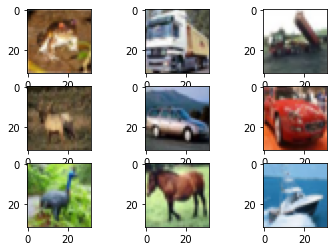

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]]


In [44]:
from matplotlib import pyplot
for i in range(9):
	# define subplot
	pyplot.subplot(330+1+i)  # 这个用法也不太懂
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()
print(trainy[:8])

# Prepocess Dataset

1、one-hot encoded lavels:Transforming the label value into a 10 element binary vector 
(sometimes dont't needed, eg: when using "sparse_categorical_crossentropy" as the loss function in model.compile, we don't need to transfrom the labels, cause this loss function expects integer labels and it does the one-hot encoding it self(sparse_))
2、Normalize the pixal data, scaling the pixel data from [0,255] to range [0,1]

In [45]:
from keras.utils import to_categorical
trainy = to_categorical(trainy)
testy = to_categorical(testy)
trainX = trainX / 255.0
testX = testX / 255.0
print(trainy[:8])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


## The following steps
 Define model--Fit model--Evaluate model--Present result--complete example
 Evaluate model: Include the diagnostics of the learning during training && the model performance

In [36]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Create a CNN model

Create the convolutional base using a stack of Conv2D and MaxPooling2D layers
As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. 

In [46]:
model = models.Sequential()
# 32 kernels of size (3,3)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [47]:
# Display the architecture of your model so far
model.summary()
# The output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape(height, width, channels).
# The width and height tend to shrink as you go deeper 
# The output channels for each Conv2D layers is controlled by the first argument

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Add Dense layer on top
# add one or more Dense layers to perform classification，
# But Dense layers take vectors as input, so we need Flatten layer to flatten the 3D ouoput
# use a final Dense layer with 10 outputs.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [49]:
# Display the complete architecture of your model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

# Compile and train the model

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(trainX, trainy, epochs=10, batch_size=64,validation_data=(trainX, trainy))

Epoch 1/10
782/782 [==============================] - 41s 52ms/step - loss: 1.5868 - accuracy: 0.4188 - val_loss: 1.3290 - val_accuracy: 0.5164
Epoch 2/10
782/782 [==============================] - 39s 49ms/step - loss: 1.2417 - accuracy: 0.5582 - val_loss: 1.1507 - val_accuracy: 0.5925
Epoch 3/10
782/782 [==============================] - 37s 48ms/step - loss: 1.0973 - accuracy: 0.6149 - val_loss: 0.9772 - val_accuracy: 0.6601
Epoch 4/10
782/782 [==============================] - 37s 47ms/step - loss: 0.9912 - accuracy: 0.6530 - val_loss: 0.8924 - val_accuracy: 0.6860
Epoch 5/10
782/782 [==============================] - 38s 49ms/step - loss: 0.9128 - accuracy: 0.6822 - val_loss: 0.8406 - val_accuracy: 0.7093
Epoch 6/10
782/782 [==============================] - 39s 50ms/step - loss: 0.8496 - accuracy: 0.7026 - val_loss: 0.8342 - val_accuracy: 0.7124
Epoch 7/10
782/782 [==============================] - 38s 48ms/step - loss: 0.8001 - accuracy: 0.7224 - val_loss: 0.7505 - val_accuracy:

# Evaluate the mode

In [54]:
loss, acc = model.evaluate(testX, testy, verbose=0)
print('the accuracy of test set is: %.3f' % (acc * 100.0))
# errors when implementing:
# .evaluate is belonging to "Model training APIs"-----no other useful information
# the last line: ValueError (None, 1)and (None, 10) is not compatible
# assumpt that is caused by one-hot coding-------solve

the accuracy of test set is: 69.680


## Note
the accuracy of test set is: 69.680, the result may vary given the stochastic nature. Consider running the example a few times and compare the average outcome

# Present the history
both the learning curves and the classification accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

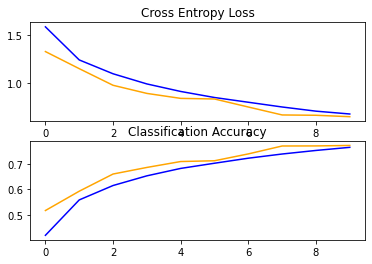

In [56]:
import sys # 涉及系统中文件
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
# pyplot.legend
pyplot.show
# save plot to file
#filename = sys.argv[0].split('/')[-1]
#pyplot.savefig(./ + '_plot.png')
#pyplot.close()

根据训练曲线，发现是拟合不足，需要增加epoches的数量

# 模型优化
拟合不足：增加epoch数量为100
为避免过拟合：define model时，增加dropout层，randomly drop nodes out of the network,起到regularation的作用

# 将各个部分用函数封装后，完整代码如下

In [57]:
# baseline model with dropout on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	pyplot.show
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

# Explore more:
https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

# Some question when implementing this moedel

1、Python 中 import的用法
import+类方法或变量，而不能加模块名吗？ nonono
问题解答方式，自己建一个文件tree,在里面建module和写class及def function,然后impor试一下
    1.import+module_name
    Python在两个地方寻找module_name: sys.path列表中 && 正在运行文件所在目录。
    其中sys.path是sys模块内置的列表变量，它存储解释器Import时所可能用到的模块。
    其中，必须保证正在运行的文件和import的module在同一个目录中！，所以不推荐此种用法  
    2.from package_name import module_name(不同级目录)
    一般把模块组成的集合称为包（package）
        Tree
        |____ m1.py
        |____ m2.py
        |____ Branch
            |____m3.py
            |____m4.py 
    eg:
        from Branch import m3
        m3.printSelf()  
    其中，如果m3中printSelf方法也是导入的呢？相对导入 VS 绝对导入 不展开
    3.from module_name import function
    from会把变量名复制到另一个作用域，所以它就可以直接在脚本中使用复制后的变量名，而不用通过模块。使用的时候就可以直接pi而不用 math.pi



Reference:
https://zhuanlan.zhihu.com/p/63143493
https://blog.csdn.net/qq_30815237/article/details/93203934
(第二个还没看完)

# 从官网下载数据集
1、https://www.cs.toronto.edu/~kriz/cifar.html
CIFAR-10 python version  
2、Explore the dataset  
2.1 the format of CIFAR images:
(image_height, image_width, color_channels) = (32, 32, 3)

2.2 dataset layout
  2.2.1 layout
 |-batches.meta
 |-data_batch_x
 |-test_batch
 |-readme.html
   2.1.2 File format
  Each file is a Python "pickled" object,("pickle" module：将python中的数据结构序列化)
  pickle.dump(obj,file[,protocal])——将结果数据流写入文件
  pickle.load(file) 将文件数据解析为python对象

  each of the batch files contains a dictionary with the following elements:
  data: 10000*3072(32*32*3)RGB
  labels:10000*1



In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_batch_1 = unpickle("./cifar-10-python/data_batch_1")
bathces = unpickle("./cifar-10-python/batches.meta")
# print(data_batch_1)
print(bathces)